# Técnicas de optimización.

### Bibliotecas necesarias.

In [2]:
import subprocess
import math
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [3]:
#Función auxiliar para imprimir os resultados
def imp_res(res):
    print(len(res))
    print("Media: ", round(np.mean(res),2), "Desv: " , round(np.std(res),5))
    print("Min: ", round(np.amin(res),5))
    return (np.mean(res), np.std(res), np.amin(res))

#Funcion auxiliar para obter o resultados estatistiocs da experimentación
def obt_res(res):
    return [np.mean(res), np.std(res), np.amin(res)]


### Probas iniciais.

In [4]:
result = subprocess.run(['./inicial.out', '10000', '10000'], stdout=subprocess.PIPE)
result.stdout.decode('utf-8')

'0.951830'

In [5]:
result = subprocess.run(['./optimizadoDin.out', '10000', '10000'], stdout=subprocess.PIPE)
result.stdout.decode('utf-8')

'0.797657'

In [6]:
result = subprocess.run(['./inicialDin.out', '10000', '10000'], stdout=subprocess.PIPE)
restext = result.stdout.decode('utf-8')
float(restext)

0.896911

In [9]:
vInicial = []
for i in tqdm(range(10), desc="Experimentacion: "):
    result = subprocess.run(['./inicial.out', '10000', '10000'], stdout=subprocess.PIPE)
    restext = result.stdout.decode('utf-8')
    vInicial.append(float(restext))
imp_res(vInicial)

Experimentacion:   0%|          | 0/10 [00:00<?, ?it/s]

10
Media:  0.83 Desv:  0.01891
Min:  0.80188


(0.8308281000000001, 0.018910061773828243, 0.801875)

### Quecemento cache e número de iteracións.

In [ ]:
#Variando ITER
medias = []
desvis = []
ites = range(1,10000,100)

n = 5000
ite = 1000
for ite in tqdm(ites):
    vInicial = []
    for i in range(10):
        result = subprocess.run(['./inicialDin.out', str(n), str(ite)], stdout=subprocess.PIPE)
        restext = result.stdout.decode('utf-8')
        vInicial.append(float(restext)/ite)
    medias.append(obt_res(vInicial)[0])
    desvis.append(obt_res(vInicial)[1])

In [ ]:
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(ites, medias, '--', color="red", label="Media")
ax.plot(ites, desvis, '--', color="green", label="Desviación típica")
ax.plot(ites, medias, '.', color="red")
ax.plot(ites, desvis, '.', color="green")
ax.legend()
 
ax.set_title("Versión Inicial: Análise da variación de ITER con N = 5000")  # Ponemos un título
ax.set_xlabel("Número ITER.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

In [8]:
n = 200000
ite = 1000

result = subprocess.run(['./inicial.out', str(n), str(ite)], stdout=subprocess.PIPE)
restext = result.stdout.decode('utf-8')
print(restext)

1.669017


## Análise Xeral.

### Inicial.

In [35]:
#Versión inivial
#Variando N
imedias = []
idesvis = []
enes = range(1,1000000,100000)

n = 1000
ite = 2000
for n in tqdm(enes):
    vInicial = []
    for i in range(10):
        result = subprocess.run(['./inicialDin.out', str(n), str(ite)], stdout=subprocess.PIPE)
        restext = result.stdout.decode('utf-8')
        vInicial.append(float(restext)/ite)
    imedias.append(obt_res(vInicial)[0])
    idesvis.append(obt_res(vInicial)[1])

  0%|          | 0/10 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


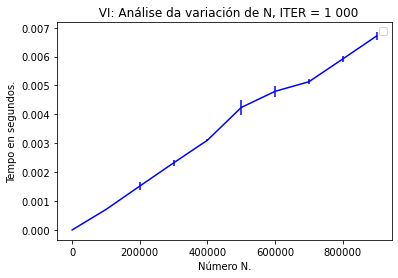

In [36]:
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.errorbar(enes, imedias, xerr=0, yerr=idesvis, color="blue")
#ax.plot(enes, imedias, '--', color="red", label="Media")
#ax.plot(enes, idesvis, '--', color="green", label="Desviación típica")
#ax.plot(enes, imedias, '.', color="red")
#ax.plot(enes, idesvis, '.', color="green")
ax.legend()
 
ax.set_title("  VI: Análise da variación de N, ITER = 1 000")  # Ponemos un título
ax.set_xlabel("Número N.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

### Optimizado.

In [37]:
#Variando N
omedias = []
odesvis = []
enes = range(1,1000000,100000)

n = 1000
ite = 2000
for n in tqdm(enes):
    vOpt = []
    for i in range(10):
        result = subprocess.run(['./optimizadoDin.out', str(n), str(ite)], stdout=subprocess.PIPE)
        restext = result.stdout.decode('utf-8')
        vOpt.append(float(restext)/ite)
    omedias.append(obt_res(vOpt)[0])
    odesvis.append(obt_res(vOpt)[1])

  0%|          | 0/10 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


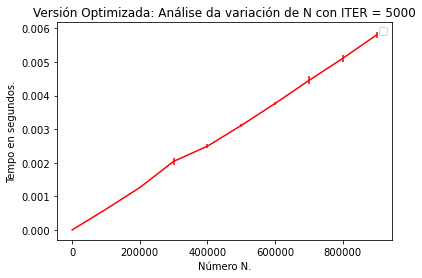

In [38]:
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.errorbar(enes, omedias, xerr=0, yerr=odesvis, color="red")
#ax.plot(enes, omedias, '--', color="red", label="Media")
#ax.plot(enes, odesvis, '--', color="green", label="Desviación típica")
#ax.plot(enes, omedias, '.', color="red")
#ax.plot(enes, odesvis, '.', color="green")
ax.legend()
 
ax.set_title("Versión Optimizada: Análise da variación de N con ITER = 5000")  # Ponemos un título
ax.set_xlabel("Número N.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

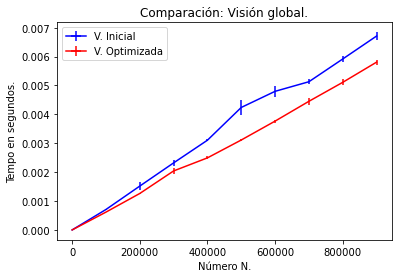

In [39]:
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
#ax.plot(enes, omedias, '--', color="red", label="VO: Media")
#ax.plot(enes, odesvis, '--', color="green", label="VO: Desviación típica")
ax.errorbar(enes, imedias, xerr=0, yerr=idesvis, color="blue", label="V. Inicial")
ax.errorbar(enes, omedias, xerr=0, yerr=odesvis, color="red", label="V. Optimizada")
#ax.plot(enes, imedias, '--', color="blue", label="VI: Media")
#ax.plot(enes, idesvis, '--', color="purple", label="VI: Desviación típica")
ax.legend()
 
ax.set_title("Comparación: Visión global.")  # Ponemos un título
ax.set_xlabel("Número N.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

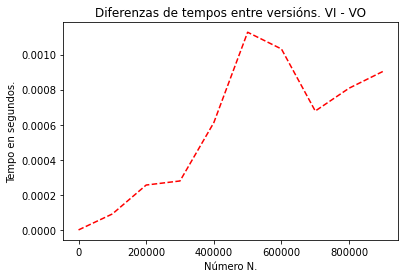

In [41]:
diferencias = []
for i in range(len(omedias)):
    diferencias.append(imedias[i] - omedias[i])
    
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)

ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(enes, diferencias, '--', color="red", label="Diferenzas.")
 
ax.set_title("Diferenzas de tempos entre versións. VI - VO")  # Ponemos un título
ax.set_xlabel("Número N.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

Xa podemos ver unha clara tendecia a aumentar as diferencias a medida que aumentamos o tamaño.

In [43]:
omedias[len(omedias)-1]/imedias[len(omedias)-1] #Proporción para tamaño 1 000 000

0.8653642140991344

In [51]:
np.mean(omedias)/np.mean(imedias)  #Proporción para medias

0.832055233107619

## Tamaños pequenos.

Pasamos agora a un análise detallado da zona inicial para ver como se comporta para valores realtivamente pequenos.

In [29]:
#Inicial
#Variando N
ipmedias = []
ipdesvis = []
enes = range(1,20000,1000)
0
n = 1000
ite = 2000
for n in tqdm(enes):
    vInicial = []
    for i in range(10):
        result = subprocess.run(['./inicialDin.out', str(n), str(ite)], stdout=subprocess.PIPE)
        restext = result.stdout.decode('utf-8')
        vInicial.append(float(restext)/ite)
    ipmedias.append(obt_res(vInicial)[0])
    ipdesvis.append(obt_res(vInicial)[1])

  0%|          | 0/20 [00:00<?, ?it/s]

In [30]:
#OPTIMIZADO
#Variando N
opmedias = []
opdesvis = []
enes = range(1,20000,1000)

n = 1000
ite = 10000
for n in tqdm(enes):
    vOpt = []
    for i in range(10):
        result = subprocess.run(['./optimizadoDin.out', str(n), str(ite)], stdout=subprocess.PIPE)
        restext = result.stdout.decode('utf-8')
        vOpt.append(float(restext)/ite)
    opmedias.append(obt_res(vOpt)[0])
    opdesvis.append(obt_res(vOpt)[1])

  0%|          | 0/20 [00:00<?, ?it/s]

In [46]:
enes = range(1,20000,1000)

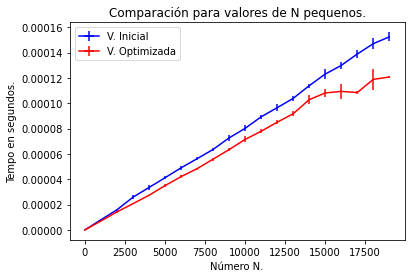

In [34]:
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.errorbar(enes, ipmedias, xerr=0, yerr=ipdesvis, color="blue", label="V. Inicial")
ax.errorbar(enes, opmedias, xerr=0, yerr=opdesvis, color="red", label="V. Optimizada")
ax.legend()
 
ax.set_title("Comparación para valores de N pequenos.")  # Ponemos un título
ax.set_xlabel("Número N.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

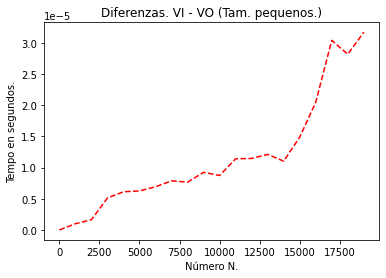

In [49]:
pdiferencias = []
for i in range(len(opmedias)):
    pdiferencias.append(ipmedias[i] - opmedias[i])
    
fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)

ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(enes, pdiferencias, '--', color="red", label="Diferenzas.")
 
ax.set_title("Diferenzas. VI - VO (Tam. pequenos.)")  # Ponemos un título
ax.set_xlabel("Número N.")  # Nombramos los ejes
ax.set_ylabel("Tempo en segundos.")
 
plt.show()  # Mostramos a figura por pantalla, que se cor

In [50]:
opmedias[len(opmedias)-1]/ipmedias[len(opmedias)-1] #Proporción para tamaño 20 000”

0.7919586513533735

In [52]:
np.mean(opmedias)/np.mean(ipmedias)  #Proporción para medias

0.849251514880371